### IMPORTING LIBRARIES

In [106]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from matplotlib import pyplot as plt
import itertools
import seaborn as sns
import matplotlib.ticker as ticker
import time
!pip install geopy
from geopy.geocoders import Nominatim
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency


### LOADING FILE

In [107]:
pwd

'C:\\Users\\karth\\Downloads'

In [108]:
df= pd.read_csv("Used vehicles.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  description   426810 non-null  object 
 18  coun

In [110]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [111]:
df.shape

(426880, 23)

In [112]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [113]:
df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [114]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Data Cleaning

### Question 1 : Print the columns which have more than and less than 30% of null values

In [115]:
#Counting number of null values in each column
df.isnull().mean()*100


region            0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

In [116]:
#Printing columns with More than and less than 30% of null values
def finding_null_columns(df,threshold):
    null_percentage=df.isnull().mean()
    null_variables_above_30=null_percentage[null_percentage>threshold].index.tolist()
    null_variables_below_30=null_percentage[null_percentage<=threshold].index.tolist()
    return null_variables_above_30,null_variables_below_30

null_variables_above_30,null_variables_below_30= finding_null_columns(df,threshold=0.3)

print('Coulmns which are having more than 30% of null values are:', null_variables_above_30)

print('Coulmns which are having less than 30% of null values are:', null_variables_below_30)


Coulmns which are having more than 30% of null values are: ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color', 'county']
Coulmns which are having less than 30% of null values are: ['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date']


In [117]:
#checking number of rows having missing values
num_missing_values_rows = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", num_missing_values_rows)


Number of rows with missing values: 426880


In [118]:
#Chekcing number of rows that are having maximum missing values
num_missing = df.isnull().sum(axis=1)
max_missing = num_missing.max()
count_max_missing = num_missing[num_missing == max_missing].count()
print("Number of rows with max missing values:", count_max_missing)


Number of rows with max missing values: 68


In [119]:
#Identifying the rows that are having more than 10 missing values
rows_with_more_than_10_missing = df[num_missing > 10]
num_rows_with_more_than_10_missing = len(rows_with_more_than_10_missing)
print("Number of rows with more than 10 missing values:", num_rows_with_more_than_10_missing)


Number of rows with more than 10 missing values: 670


In [120]:
#Deleting rows having more than 10 missing values
deleting_rows= num_missing[num_missing>10].index
df.drop(index=deleting_rows,inplace=True)

In [121]:
df.shape

(426210, 23)

In [122]:
# finding unique values in columns
slice = ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color', 'county']
df[slice].nunique()

condition           6
cylinders           8
VIN            117947
drive               3
size                4
paint_color        12
county              0
dtype: int64

In [123]:
#Removing few un useful columns having more than 30% of null values
Deleted_columns=['VIN','county','size','drive']
df.drop(columns=Deleted_columns,inplace =True)


In [124]:
df.shape

(426210, 19)

In [125]:
df.isna().mean()*100

region           0.000000
price            0.000000
year             0.266770
manufacturer     4.111588
model            1.220056
condition       40.692147
cylinders       41.530701
fuel             0.558879
odometer         0.884306
title_status     1.785739
transmission     0.451655
type            21.629713
paint_color     30.391826
image_url        0.000000
description      0.000469
state            0.000000
lat              1.511461
long             1.511461
posting_date     0.000000
dtype: float64

### Question 2: Using for loop to identify if null values of cylinders,condition,paint_color column are due to Missing at Random, also plot heat map (Hint: Correlation)

In [126]:
#checking if null values of below columns due to Missing at Random

cols = ['cylinders', 'condition', 'paint_color']

# iterating over the columns and creating combination calculating the correlation between missing values
for col1, col2, col3 in itertools.combinations(cols, 3):
    corr_matrix = df[[col1, col2, col3]].isnull().corr() #creating correlation matrix between missing values of variables
#creating variables for combinations
    corr12 = corr_matrix.iloc[0,1]
    corr13 = corr_matrix.iloc[0,2]
    corr23 = corr_matrix.iloc[1,2]
#conditioning if absolute correlation of combinations are significant or not
    if abs(corr12) < 0.05 and abs(corr13) < 0.05 and abs(corr23) < 0.05:
        print(f"Correlation between missing values of columns '{col1}', '{col2}' and '{col3}' are not significant, they are missing at random.")
    else:
        print(f"Correlation between missing values of columns '{col1}', '{col2}' and '{col3}' are significant, may not be missing at random.")



Correlation between missing values of columns 'cylinders', 'condition' and 'paint_color' are significant, may not be missing at random.


<AxesSubplot:>

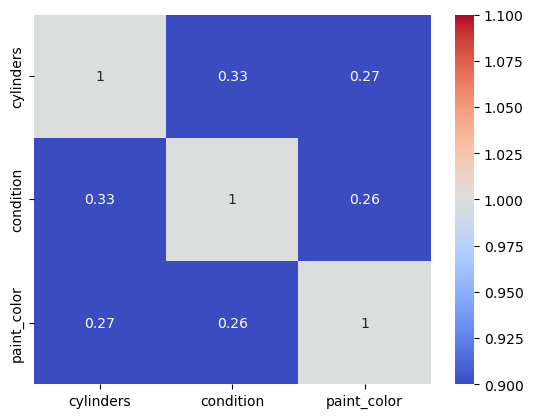

In [127]:
#Further analysis using heat map to identify reason for missing
import seaborn as sns
heat_map_columns_df = df[['cylinders', 'condition', 'paint_color']]
sns.heatmap(heat_map_columns_df.isnull().corr(),cmap='coolwarm',annot=True,vmin=1,vmax=1)

In [128]:
cols = ['cylinders', 'condition', 'paint_color']
subset = df[cols].copy()

In [129]:
obs = pd.crosstab(subset[cols[0]].isnull(), subset[cols[1]].isnull(), subset[cols[2]].isnull(), aggfunc='count')
chi2, p, dof, ex = chi2_contingency(obs, correction=False)
print(f'Chi-Square Test Statistic: {chi2:.4f}')
print(f'P-value: {p:.4f}')

Chi-Square Test Statistic: 45468.1248
P-value: 0.0000


In [130]:
df.isna().mean()*100

region           0.000000
price            0.000000
year             0.266770
manufacturer     4.111588
model            1.220056
condition       40.692147
cylinders       41.530701
fuel             0.558879
odometer         0.884306
title_status     1.785739
transmission     0.451655
type            21.629713
paint_color     30.391826
image_url        0.000000
description      0.000469
state            0.000000
lat              1.511461
long             1.511461
posting_date     0.000000
dtype: float64

In [131]:
#replacing nan, empty string,none with NaN
for column in ['cylinders', 'condition', 'paint_color']:
    df[column]=df[column].replace("nan",np.NaN)
    df[column]=df[column].replace("",np.NaN)
    df[column]=df[column].replace("none",np.NaN)

In [132]:
df.isna().mean()*100

region           0.000000
price            0.000000
year             0.266770
manufacturer     4.111588
model            1.220056
condition       40.692147
cylinders       41.530701
fuel             0.558879
odometer         0.884306
title_status     1.785739
transmission     0.451655
type            21.629713
paint_color     30.391826
image_url        0.000000
description      0.000469
state            0.000000
lat              1.511461
long             1.511461
posting_date     0.000000
dtype: float64

### Question 3: Replace null values of remaining categorical variables with one of the measures of central tendency by using group by function for appropriate variables (Hint: Use Manufacturer, model and few necessary variables for group by )

In [133]:
#Replacing the null values with mode as they are categorical variables
for column in df[['cylinders','condition','paint_color']]:
    mode=df[column].mode()
#     print(mode)
    df[column].fillna(mode[0], inplace = True)
#     df[column]=df[column].fillna(mode)

In [134]:
#checking if there are any null values for below columns
df[['cylinders','condition','paint_color']].isnull().sum()

cylinders      0
condition      0
paint_color    0
dtype: int64

In [135]:
df.isnull().sum()

region              0
price               0
year             1137
manufacturer    17524
model            5200
condition           0
cylinders           0
fuel             2382
odometer         3769
title_status     7611
transmission     1925
type            92188
paint_color         0
image_url           0
description         2
state               0
lat              6442
long             6442
posting_date        0
dtype: int64

In [136]:
#identifying unique values in below columns
Uniques=['manufacturer','model','transmission','type','fuel']
df[Uniques].nunique()

manufacturer       42
model           29641
transmission        3
type               13
fuel                5
dtype: int64

In [137]:
#identifying the Mode of each model by multiple categories
model_mode_by_multiple_categories = df.groupby(['manufacturer','type','transmission','fuel'])['model'].agg(pd.Series.mode).reset_index()
model_mode_by_multiple_categories

,manufacturer,type,transmission,fuel,model
0,acura,SUV,automatic,gas,mdx
1,acura,SUV,automatic,other,mdx advance and
2,acura,SUV,manual,gas,"[mdx, mdx touring, rdx]"
3,acura,SUV,other,diesel,mdx sh-awd w/technology
4,acura,SUV,other,gas,mdx sh-awd sport utility
5,acura,SUV,other,hybrid,mdx sport hybrid sh-awd
6,acura,SUV,other,other,mdx sh-awd sport utility
7,acura,coupe,automatic,gas,rsx
8,acura,coupe,manual,gas,"[3.2 cl type s, rsx]"
9,acura,coupe,other,gas,cl type-s


In [138]:
#checking if any null values exist for this category
model_mode_by_multiple_categories.isnull().sum()

manufacturer    0
type            0
transmission    0
fuel            0
model           0
dtype: int64

In [139]:
#filling missing values of model column by the mode based on the other columns
def fill_model_nulls(row):
    if pd.isnull(row['model']):
        mode_value = model_mode_by_multiple_categories.loc[
            (model_mode_by_multiple_categories['manufacturer'] == row['manufacturer']) &
            (model_mode_by_multiple_categories['type'] == row['type']) &
            (model_mode_by_multiple_categories['transmission'] == row['transmission']) &
            (model_mode_by_multiple_categories['fuel'] == row['fuel']), 'model']
        if not mode_value.empty:
            return mode_value.values[0]
    return row['model']

df['model'] = df.apply(fill_model_nulls, axis=1)

In [140]:
#Number of null values that the model column is having
df['model'].isnull().sum()

2308

In [141]:
#replaces '-' of model and manufacturer with ''
df['model'] = df['model'].str.replace('-',' ') 
df['manufacturer'] = df['manufacturer'].str.replace('-',' ')

In [142]:
#deleting the rest of null values of model column
df.dropna(subset=['model'],inplace =True)
df.shape

(423723, 19)

In [143]:
df.isna().sum()

region              0
price               0
year             1137
manufacturer    17523
model               0
condition           0
cylinders           0
fuel             2382
odometer         3766
title_status     7611
transmission     1909
type            89896
paint_color         0
image_url           0
description         2
state               0
lat              6437
long             6437
posting_date        0
dtype: int64

In [144]:
# df['manufacturer']=df['manufacturer'].str.replace('-',' ')

In [145]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
       'harley davidson', 'datsun', 'aston martin', 'land rover'],
      dtype=object)

In [146]:
# df['model']= df['model'].str.replace('-',' ')

In [147]:
mode_manufacturer_by_model = df.groupby(['model'])['manufacturer'].agg(lambda x: pd.Series.mode(x)).reset_index()



In [148]:
mode_manufacturer_by_model = mode_manufacturer_by_model.set_index(['model'])


In [149]:
mode_manufacturer_by_model

,manufacturer
model,
,chevrolet
1500 Promaster Vans,[]
240d,mercedes benz
328i convertible,bmw
4 DOOR ACCORD SAFETY SENSING,[]
...,...
♦ALL TADES WELCOME!♦,[]
♿,chrysler
♿ vmi,chrysler


In [150]:
df.dropna(subset = ['manufacturer'],inplace=True) #dropping null values of manufacturer as it is not ideal to replace

In [151]:
#replacing other title status variable with its mode
title_status_mode = df['title_status'].mode()[0]
df['title_status'].fillna(title_status_mode, inplace=True)

In [152]:

#grouping fuel by model and manufacturer and finding the mode for fuel


mode_fuel_by_manufacturer_model = df.groupby(['manufacturer','model'])['fuel'].agg(lambda x: pd.Series.mode(x)).reset_index()
mode_fuel_by_manufacturer_model

#replacing null values with the mode




,manufacturer,model,fuel
0,acura,2002 rsx type s,gas
1,acura,3.0cl,gas
2,acura,3.2 cl type s,gas
3,acura,3.2 tl,gas
4,acura,3.2 tl sport,gas
...,...,...,...
23944,volvo,xc90 t8 inscription 1300 miles,gas
23945,volvo,xc90 v8,gas
23946,volvo,xc90 v8 awd,gas
23947,volvo,xc90 v8 awdsuv,gas


In [153]:
mode_fuel_by_manufacturer_model = mode_fuel_by_manufacturer_model.set_index(['manufacturer', 'model'])
mode_fuel_dict = mode_fuel_by_manufacturer_model.to_dict()['fuel']
df['fuel'] = df.apply(lambda x: mode_fuel_dict.get((x['manufacturer'], x['model']), x['fuel']), axis=1)


In [154]:
mode_transmission_by_manufacturer_model = df.groupby(['manufacturer','model'])['transmission'].agg(lambda x:pd.Series.mode(x)).reset_index()

In [155]:
mode_transmission_by_manufacturer_model= mode_transmission_by_manufacturer_model.set_index(['manufacturer','model'])
mode_transmission_dict= mode_transmission_by_manufacturer_model.to_dict()['transmission']
df['transmission']= df.apply(lambda x: mode_transmission_dict.get((x['manufacturer'],x['model']),x['transmission']),axis=1)

In [156]:
df.isna().sum()

region              0
price               0
year                6
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         3609
title_status        0
transmission        0
type            83533
paint_color         0
image_url           0
description         2
state               0
lat              6258
long             6258
posting_date        0
dtype: int64

In [157]:
mode_type_manufacturer_model= df.groupby(['manufacturer','model'])['type'].agg(lambda x: pd.Series.mode(x)).reset_index()

In [158]:
#replacing null values with the mode of type column based on manufacturer and model
mode_type_manufacturer_model= mode_type_manufacturer_model.set_index(['manufacturer','model'])
mode_type_dict=mode_type_manufacturer_model.to_dict()['type']
df['type']=df.apply(lambda x: mode_type_dict.get((x['manufacturer'],x['model']),x['type']),axis=1
                   )

In [159]:
df.isnull().sum()

region             0
price              0
year               6
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        3609
title_status       0
transmission       0
type               0
paint_color        0
image_url          0
description        2
state              0
lat             6258
long            6258
posting_date       0
dtype: int64

### Question 4: Delete the unnecessary variables, replace the null values of odometer column using random imputation technique (Hint: should import random library, calculate probability of each unique odometer value in the input dataframe that is not missing.)

In [160]:
#deleting description and posting_date columns
x=['description','posting_date']
df.drop(x,axis=1,inplace=True)

In [161]:
#finding skewness of odometer column
skew_odometer= df['odometer'].skew()
print(skew_odometer)

41.73623580201113


In [162]:
df[~df['odometer'].isna()].shape

(402591, 17)

In [163]:
pd.set_option('display.max_rows',10000)

In [164]:
#tabular representation of histogram of odometer
odometer_df = (df[~df['odometer'].isna()]['odometer'].astype(int).value_counts()/327125).reset_index().rename(columns = {'index':'Odometer','odometer':'percentage'})

In [165]:
probabilities = list(odometer_df['percentage'])
odometer_values = list(odometer_df['Odometer'])

In [166]:
df['Row_no']=df.index

In [167]:
import copy
df1 = copy.deepcopy(df)

In [168]:
#replacing missing values of odometer with random values based on probabilities weights mentioned in 'probabilities'
random.choices(odometer_values, weights = probabilities)
count = 0
for index, row in df[df['odometer'].isna()].iterrows():
    random.seed(row['Row_no'])
    random_num = random.choices(odometer_values, weights = probabilities)[0]
    df.loc[index,'odometer'] = random_num
    if count%100==0:
        print(count)
    count+=1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


In [169]:
mode_year_manufacturer=df.groupby(['manufacturer'])['year'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
mode_year_manufacturer

,manufacturer,year
0,acura,2018.0
1,alfa romeo,2018.0
2,aston martin,2014.0
3,audi,2018.0
4,bmw,2018.0
5,buick,2020.0
6,cadillac,2020.0
7,chevrolet,2015.0
8,chrysler,2015.0
9,datsun,1971.0


In [170]:
#Grouping year by manufacturer and replacing null values of year by mode
df['year'] = df.groupby(['manufacturer'])['year'].apply(lambda x: x.fillna(x.mode()[0]))

In [171]:
df.isna().sum()

region             0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission       0
type               0
paint_color        0
image_url          0
state              0
lat             6258
long            6258
Row_no             0
dtype: int64

### Question 5:Retrieve the null values of lat & long using geopy package and get_coordinates function by taking region column as reference

In [172]:
#filtering the unique values of region where lat column is missing
empty_regions_list= list(df[df['lat'].isna()]['region'].unique())

In [173]:
#creating instance of nominatim class of geopy.geocoder with user_agent "my_application" which is default
geolocator = Nominatim(user_agent="my_application")

In [174]:
'''defining a function to return the Latitude and longitude of a given location (region). 
If coordinates are not identified then empty values will be returned '''
def get_coordinates(region):
    try:
        coordinates = geolocator.geocode(region)
    except:
        coordinates = None
    
    if coordinates:
        latitude = coordinates.latitude
        longitude = coordinates.longitude
        return latitude, longitude
    else:
        return "",""
    time.sleep(1)

In [175]:
len(empty_regions_list)

289

In [176]:
'''loops through the unique regions which don't have the coordinates 
and gets the coordinates using get_coordinates function defined above'''
for location in empty_regions_list:
    print(location)
    latitude, longitude = get_coordinates(location)
    df.loc[(df['region']==location) & (df['lat'].isna()), 'lat'] = latitude
    df.loc[(df['region']==location) & (df['long'].isna()), 'long'] = longitude

birmingham
gadsden-anniston
huntsville / decatur
mobile
montgomery
anchorage / mat-su
flagstaff / sedona
mohave county
phoenix
show low
fayetteville
fort smith
jonesboro
little rock
texarkana
bakersfield
chico
fresno / madera
gold country
hanford-corcoran
humboldt county
los angeles
merced
modesto
orange county
sacramento
san diego
santa barbara
SF bay area
siskiyou county
stockton
ventura county
boulder
colorado springs
denver
eastern CO
fort collins / north CO
high rockies
pueblo
western slope
eastern CT
hartford
new haven
northwest CT
washington, DC
ft myers / SW florida
gainesville
heartland florida
jacksonville
lakeland
north central FL
okaloosa / walton
orlando
pensacola
south florida
space coast
tallahassee
tampa bay area
treasure coast
albany
athens
atlanta
augusta
brunswick
columbus
macon / warner robins
northwest GA
savannah / hinesville
lewiston / clarkston
spokane / coeur d'alene
bloomington-normal
champaign urbana
chicago
decatur
la salle co
peoria
quad cities, IA/IL
rockf

In [177]:
df[df['region']=='birmingham'][['region','lat','long']]

,region,lat,long
169,birmingham,33.384664,-86.737847
170,birmingham,33.384664,-86.737847
172,birmingham,33.384664,-86.737847
173,birmingham,33.384664,-86.737847
174,birmingham,33.384664,-86.737847
175,birmingham,33.384664,-86.737847
176,birmingham,33.384664,-86.737847
177,birmingham,33.384664,-86.737847
178,birmingham,33.384664,-86.737847
179,birmingham,33.384664,-86.737847


In [178]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
paint_color     0
image_url       0
state           0
lat             0
long            0
Row_no          0
dtype: int64

In [179]:
df['lat'].replace("",np.NaN, inplace = True)
df['long'].replace("",np.NaN, inplace = True)

In [180]:
df.isna().sum()

region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
type              0
paint_color       0
image_url         0
state             0
lat             226
long            226
Row_no            0
dtype: int64

In [181]:
df[df['lat'].isna()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,image_url,state,lat,long,Row_no
5158,anchorage / mat-su,18950,2014.0,chevrolet,silverado 1500,like new,6 cylinders,gas,113112.0,clean,automatic,truck,white,https://images.craigslist.org/00L0L_5EEEQka4tB...,ak,NaN,NaN,5158
10960,phoenix,11995,2011.0,toyota,highlander,good,6 cylinders,gas,175954.0,clean,automatic,SUV,white,https://images.craigslist.org/00o0o_mvjGEWmYWL...,az,NaN,NaN,10960
10985,phoenix,6995,2012.0,kia,optima ex,good,6 cylinders,gas,158253.0,clean,automatic,sedan,white,https://images.craigslist.org/00o0o_jln11PiobY...,az,NaN,NaN,10985
10986,phoenix,9995,2016.0,kia,soul,good,6 cylinders,gas,82797.0,clean,automatic,wagon,black,https://images.craigslist.org/01111_aHLfUEs0yM...,az,NaN,NaN,10986
10988,phoenix,5995,2013.0,chevrolet,impala,good,6 cylinders,gas,124088.0,clean,automatic,sedan,red,https://images.craigslist.org/00V0V_2WOAgRntjD...,az,NaN,NaN,10988
10995,phoenix,4995,2008.0,chevrolet,hhr ss,good,6 cylinders,gas,158206.0,clean,automatic,"[SUV, van]",black,https://images.craigslist.org/00q0q_gW5jIBqUKe...,az,NaN,NaN,10995
11000,phoenix,7495,2012.0,hyundai,sonata hybrid,good,6 cylinders,hybrid,129881.0,clean,automatic,sedan,blue,https://images.craigslist.org/00z0z_ixEzgISKWr...,az,NaN,NaN,11000
11002,phoenix,24500,2016.0,ford,mustang gt,good,6 cylinders,gas,68252.0,clean,manual,coupe,white,https://images.craigslist.org/00606_eXZ2hEpIOg...,az,NaN,NaN,11002
11004,phoenix,12995,2015.0,buick,encore,good,6 cylinders,gas,59873.0,clean,automatic,SUV,white,https://images.craigslist.org/00N0N_jZwwVsIL1y...,az,NaN,NaN,11004
11005,phoenix,2995,2003.0,pontiac,montana,good,6 cylinders,gas,198590.0,clean,automatic,mini-van,white,https://images.craigslist.org/00j0j_aP9NX2Dlj3...,az,NaN,NaN,11005


* There are still 18 records which does not have latitude and longitude because the geopy package also could not get the coordinates for those locations as it could not understand the format in which the region is in this dataset.
  * Example: anchorage / mat-su.

In [182]:
df.dropna(subset=['lat','long'],inplace=True)

In [183]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
paint_color     0
image_url       0
state           0
lat             0
long            0
Row_no          0
dtype: int64

## Outliers detection

### Question 6: Remove outliers in odometer, price variables and plot a scatter plot to interpret (Hint: Use IQR for outliers)

In [184]:
df.shape

(405974, 18)

In [185]:
outliers_check = ['odometer', 'price']
outliers_counts = {}

for col in outliers_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify and count outliers in the current column
    current_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    outliers_counts[col] = current_outliers.shape[0]
    
    # Drop rows containing outliers in the current column
    df = df.drop(current_outliers.index)

print(outliers_counts)



{'odometer': 3362, 'price': 7227}


In [186]:
df.shape

(395385, 18)

In [187]:
# Filter the dataframe to select only cars in good condition and in the Wichita region
good_cars = df[(df['condition'] == 'good') & (df['region'] == 'wichita')]

# Create a dictionary of cars with their information
good_cars_dict = {}
for index, row in good_cars.iterrows():
    good_cars_dict[row['manufacturer']] = {
        'Odometer Reading': row['odometer'],
        'Title Status': row['title_status'],
        'Year': row['year'],
        'Price': row['price'],
    }

# Convert the dictionary to a pandas dataframe
df_cars = pd.DataFrame.from_dict(good_cars_dict, orient='index')

# Print the dataframe
print(df_cars)


                 Odometer Reading Title Status    Year  Price
nissan                    95044.0        clean  2017.0  13995
audi                      45104.0        clean  2015.0  18298
lexus                     75436.0        clean  2011.0  18995
infiniti                 113853.0        clean  2011.0  19995
toyota                   137000.0      rebuilt  2006.0   3500
ford                     173000.0        clean  2013.0  18495
bmw                      146250.0        clean  2013.0   9000
chevrolet                 94860.0        clean  2014.0  23999
dodge                     51774.0        clean  2015.0  18198
jeep                     178000.0        clean  1989.0   7000
gmc                      132839.0        clean  2016.0  25950
buick                    107331.0        clean  2005.0   8991
mercedes benz              3995.0        clean  2015.0  56000
chrysler                  97292.0        clean  2018.0  16900
harley davidson            1235.0        clean  2013.0   7495
ram     

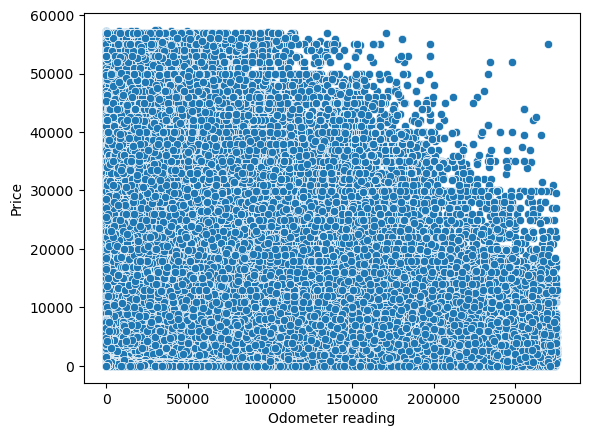

In [188]:
# Extract variables of interest
x = df['odometer']
y = df['price']

# Create scatter plot
sns.scatterplot(x=x, y=y)

# Set axis labels
plt.xlabel('Odometer reading')
plt.ylabel('Price')

# Show plot
plt.show()


### Question 7: Plot a pie chart for count of cars from 2017 with different fuel types and automatic transmission

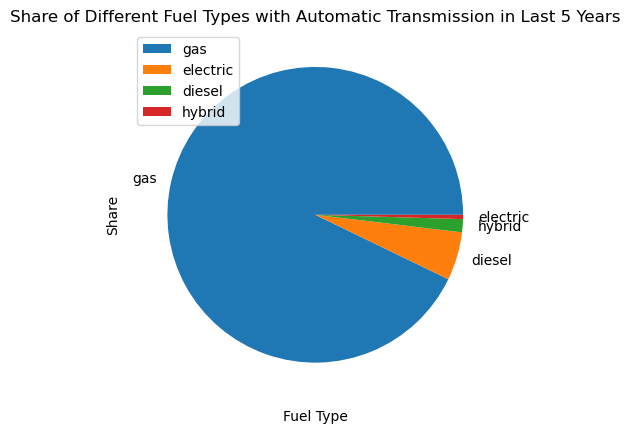

In [189]:
# Filter the data to include only cars with automatic transmission and model year 2017 or later
pie_cars = df[(df['year'] >= 2017) & (df['transmission'].astype(str) == 'automatic')]

# Filter the data to include only gas, diesel, electric, and hybrid fuel types
pie_cars = pie_cars[pie_cars['fuel'].isin(('gas', 'diesel', 'electric', 'hybrid'))]

# Compute the fuel counts and shares for the filtered data
fuel_counts = pie_cars['fuel'].value_counts()
fuel_shares = fuel_counts / fuel_counts.sum()

# Define the labels for the pie chart
labels = ['gas', 'electric', 'diesel', 'hybrid']

# Create the pie chart
fuel_shares.plot(kind='pie')
plt.xlabel('Fuel Type')
plt.ylabel('Share')
plt.title('Share of Different Fuel Types with Automatic Transmission in Last 5 Years')
plt.legend(labels, loc="upper left")

# Show the plot
plt.show()

### Question 8: Plot Bar graphs for Average odometer reading of different transmissions of cars made in 21st century. Also plot top and least 5 average prices of cars by regions and manufacturer.

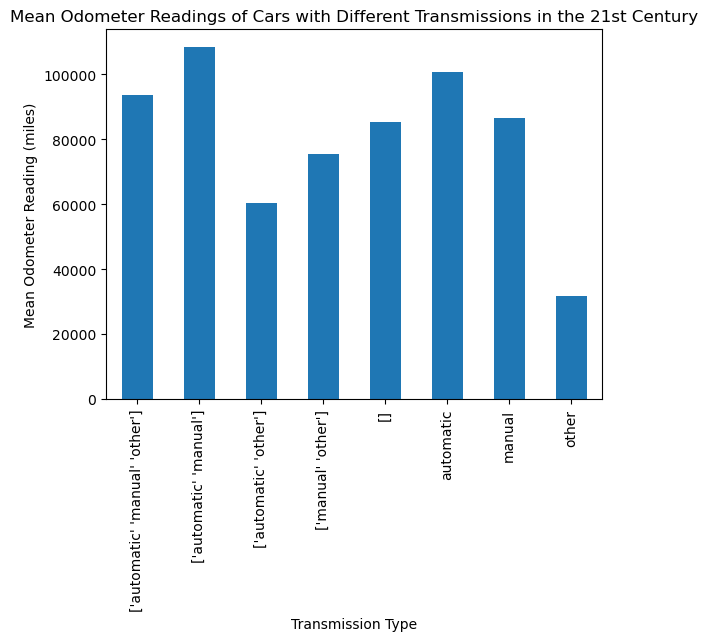

In [190]:


# Filter the data to include only cars from the 21st century
century21 = df[(df['year'] >= 2000)]

# Group by transmission and compute the mean odometer reading for each group
bar_cars = century21.groupby(df['transmission'].astype(str))['odometer'].mean()

# Create a bar chart
bar_cars.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Transmission Type')
plt.ylabel('Mean Odometer Reading (miles)')
plt.title('Mean Odometer Readings of Cars with Different Transmissions in the 21st Century')

# Show the plot
plt.show()


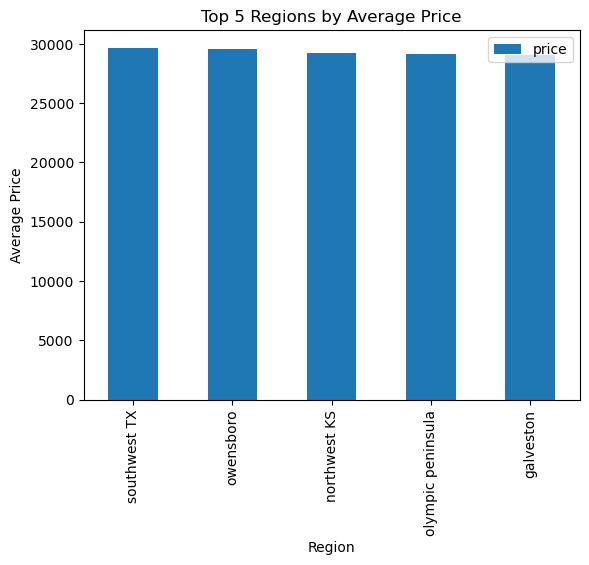

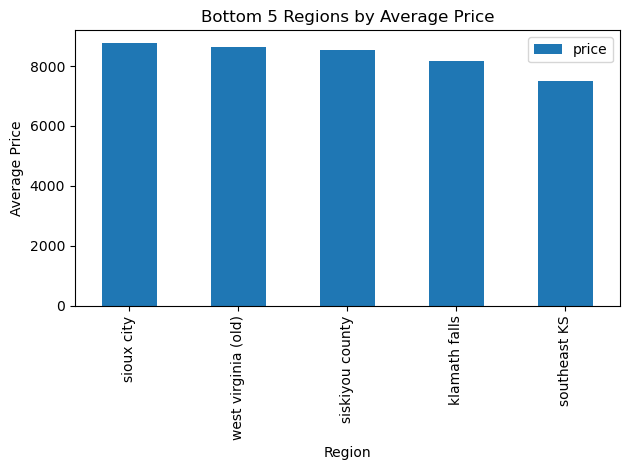

In [191]:

# Define the list of columns to use
columns_to_use = ['region', 'price']

# Group the data by region and compute the average price
region_prices = df[columns_to_use].groupby('region').mean().sort_values(by='price', ascending=False)

# Create a bar chart of the top 5 regions
top_5 = region_prices.head(5)
top_5.plot(kind='bar', y='price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Top 5 Regions by Average Price')

# Create a bar chart of the bottom 5 regions
bottom_5 = region_prices.tail(5)
bottom_5.plot(kind='bar', y='price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Bottom 5 Regions by Average Price')

# Show the plots
plt.tight_layout()
plt.show()


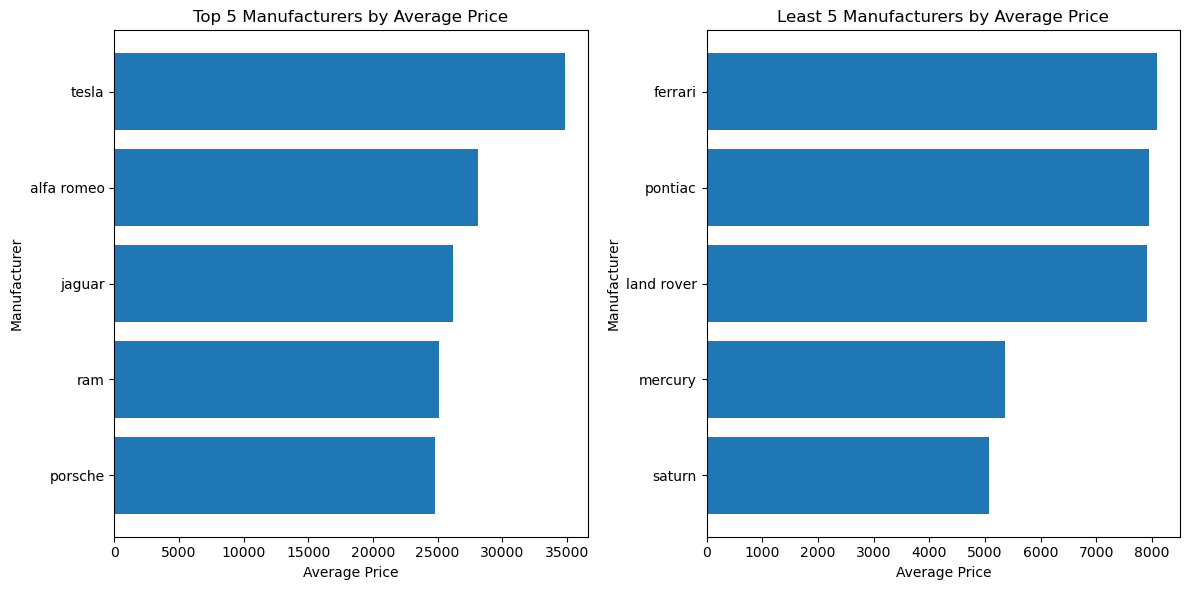

In [192]:
# Calculating the average price by manufacturer
average_price_manufacturer = df.groupby('manufacturer')['price'].mean().sort_values()

# Plot the top 5 and least 5 average prices by manufacturer
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Top five
top_5 = average_price_manufacturer.tail(5)
ax1.barh(top_5.index, top_5.values)
ax1.set_title('Top 5 Manufacturers by Average Price')
ax1.set_xlabel('Average Price')
ax1.set_ylabel('Manufacturer')

# Least five
least_5 = average_price_manufacturer.head(5)
ax2.barh(least_5.index, least_5.values)
ax2.set_title('Least 5 Manufacturers by Average Price')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('Manufacturer')

plt.tight_layout()
plt.show()


### Question 9: Filter out the cars from manufacturers Toyota, Honda, and Nissan and compare the prices of cars that ran less than 100,000 miles with clean title status using a box plot.

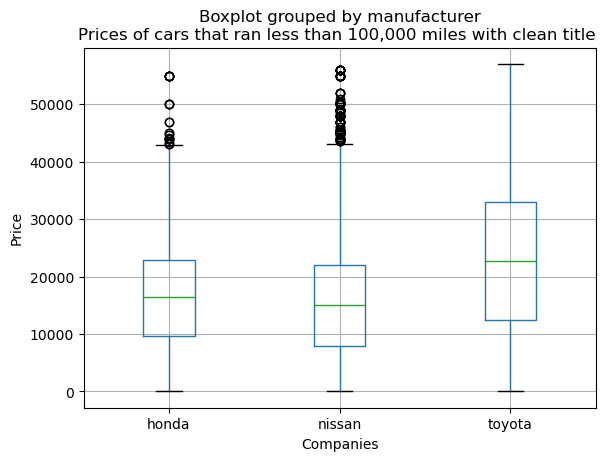

In [193]:

cmpy = df[df['manufacturer'].isin(['toyota', 'honda', 'nissan'])]

mil = cmpy[(cmpy['odometer'] < 100000) & (cmpy['title_status'] == 'clean')]

mil.boxplot(column='price', by='manufacturer')

plt.xlabel('Companies')
plt.ylabel('Price')
plt.title('Prices of cars that ran less than 100,000 miles with clean title ')

plt.show()


In [194]:
list(df.columns)

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'type',
 'paint_color',
 'image_url',
 'state',
 'lat',
 'long',
 'Row_no']

In [195]:
df['region'].nunique()

404

In [196]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,image_url,state,lat,long,Row_no
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,27
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,automatic,truck,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,28
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.590,-85.4800,29
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.590,-85.4800,30
31,auburn,15000,2013.0,ford,f 150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592,-85.5189,31


In [197]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
Row_no            int64
dtype: object

In [198]:
hashable_columns = []

for column_name in df.columns:
    try:
        hashable = all(isinstance(value, (str, int, float, tuple)) for value in df[column_name])
        if hashable:
            hashable_columns.append(column_name)
    except TypeError:
        pass

print("Hashable columns:", hashable_columns)

Hashable columns: ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'odometer', 'title_status', 'paint_color', 'image_url', 'state', 'lat', 'long', 'Row_no']


In [199]:
columns_to_convert=['transmission','fuel','type']
df[columns_to_convert]=df[columns_to_convert].astype(str)

In [200]:
# List of categorical columns
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                       'title_status', 'transmission', 'type', 'paint_color', 'state']

# Display the number of unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")


Number of unique values in region: 404
Number of unique values in manufacturer: 41
Number of unique values in model: 22731
Number of unique values in condition: 6
Number of unique values in cylinders: 8
Number of unique values in fuel: 17
Number of unique values in title_status: 6
Number of unique values in transmission: 8
Number of unique values in type: 72
Number of unique values in paint_color: 12
Number of unique values in state: 51


### FEATURE ENGINEERING

In [201]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,image_url,state,lat,long,Row_no
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590000,-85.480000,27
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,automatic,truck,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590000,-85.480000,28
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.590000,-85.480000,29
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.590000,-85.480000,30
31,auburn,15000,2013.0,ford,f 150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592000,-85.518900,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,sedan,white,https://images.craigslist.org/00o0o_iiraFnHg8q...,wy,33.786500,-84.445400,426875
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,wy,33.786500,-84.445400,426876
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,gas,4174.0,clean,other,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,wy,33.779214,-84.411811,426877
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,wy,33.786500,-84.445400,426878


In [202]:
import category_encoders as ce

In [203]:
columns_to_encode = ['cylinders', 'condition', 'title_status', 'transmission', 'paint_color', 'fuel']

# Instantiate the BinaryEncoder
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Fit and transform the encoder on the specified columns
encoded_cols = encoder.fit_transform(df[columns_to_encode])

# Drop the original columns
df_encoded = df.drop(columns=columns_to_encode,inplace=True)



In [214]:
encoded_cols_list = print(encoded_cols.columns.to_list())


['cylinders_0', 'cylinders_1', 'cylinders_2', 'cylinders_3', 'condition_0', 'condition_1', 'condition_2', 'title_status_0', 'title_status_1', 'title_status_2', 'transmission_0', 'transmission_1', 'transmission_2', 'transmission_3', 'paint_color_0', 'paint_color_1', 'paint_color_2', 'paint_color_3', 'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3', 'fuel_4']


In [204]:
df

,region,price,year,manufacturer,model,odometer,type,image_url,state,lat,long,Row_no
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,57923.0,pickup,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590000,-85.480000,27
28,auburn,22590,2010.0,chevrolet,silverado 1500,71229.0,truck,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590000,-85.480000,28
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,19160.0,pickup,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.590000,-85.480000,29
30,auburn,30990,2017.0,toyota,tundra double cab sr,41124.0,pickup,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.590000,-85.480000,30
31,auburn,15000,2013.0,ford,f 150 xlt,128000.0,truck,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592000,-85.518900,31
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,32226.0,sedan,https://images.craigslist.org/00o0o_iiraFnHg8q...,wy,33.786500,-84.445400,426875
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,12029.0,sedan,https://images.craigslist.org/00x0x_15sbgnxCIS...,wy,33.786500,-84.445400,426876
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,4174.0,hatchback,https://images.craigslist.org/00L0L_farM7bxnxR...,wy,33.779214,-84.411811,426877
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,30112.0,sedan,https://images.craigslist.org/00z0z_bKnIVGLkDT...,wy,33.786500,-84.445400,426878


In [210]:
# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df,encoded_cols], axis=1)

In [215]:
df_encoded.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['region', 'price', 'year', 'manufacturer', 'model', 'odometer', 'type',
       'image_url', 'state', 'lat', 'long', 'Row_no', 'cylinders_0',
       'cylinders_1', 'cylinders_2', 'cylinders_3', 'condition_0',
       'condition_1', 'condition_2', 'title_status_0', 'title_status_1',
       'title_status_2', 'transmission_0', 'transmission_1', 'transmission_2',
       'transmission_3', 'paint_color_0', 'paint_color_1', 'paint_color_2',
       'paint_color_3', 'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3', 'fuel_4'],
      dtype='object')>

### DATA SPLIT

In [216]:
from sklearn.model_selection import train_test_split

df_encoded_train, df_encoded_test = train_test_split(df_encoded, test_size=0.2, random_state=42)


In [217]:
def target_encode_with_smoothing(df_encoded, cat_feature, target, alpha=5):
    """
    Apply target encoding with smoothing.
    """
    global_mean = df_encoded[target].mean()
    agg = df_encoded.groupby(cat_feature)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + global_mean * alpha) / (counts + alpha)
    
    # Mapping the smoothed values
    return df_encoded[cat_feature].map(smooth)


In [218]:
# Target encoding on the training set
df_encoded_train['model_encoded'] = target_encode_with_smoothing(df_encoded_train, 'model', 'price', alpha=5)


In [220]:
# Apply the same encoding to the test set
global_mean = df_encoded_train['price'].mean()  # fallback for unseen categories
means = df_encoded_train.groupby('model')['price'].mean()  # mean price per model in training
df_encoded_test['model_encoded'] = df_encoded_test['model'].map(means).fillna(global_mean)


In [221]:
df_encoded_combined = pd.concat([df_encoded_train, df_encoded_test])

# Dropping the original 'model' column
df_encoded_final = df_encoded_combined.drop(columns=['model'])

print(df_encoded_final)

                 region  price    year manufacturer  odometer    type  \
360170        nashville  10979  2013.0         ford   96381.0   sedan   
309420            tulsa   9987  2012.0     chrysler   62437.0   sedan   
346096         columbia  30590  2017.0     infiniti   34415.0   coupe   
2071             dothan  36590  2018.0         audi   32409.0     SUV   
132940            boise      0  2012.0         ford  126968.0  pickup   
...                 ...    ...     ...          ...       ...     ...   
58821     santa barbara  12864  2015.0       toyota       0.0     SUV   
310975             bend      0  2019.0         ford   79465.0   truck   
320875  medford-ashland   5800  2007.0         ford  103000.0     SUV   
318330           eugene    451  2015.0         ford   28761.0   coupe   
373720        galveston  44900  2014.0          ram  152034.0      []   

                                                image_url state        lat  \
360170  https://images.craigslist.org/00W0W_6

In [223]:
df_encoded_final.drop(['Row_no','image_url'],inplace=True,axis=1)

In [228]:
df_encoded_final

,region,price,year,manufacturer,odometer,type,state,lat,long,cylinders_0,...,paint_color_0,paint_color_1,paint_color_2,paint_color_3,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,model_encoded
360170,nashville,10979,2013.0,ford,96381.0,sedan,tn,36.006832,-84.014656,0,...,0,1,0,1,0,0,0,0,1,8607.200429
309420,tulsa,9987,2012.0,chrysler,62437.0,sedan,ok,36.101921,-95.885277,0,...,0,0,0,1,0,0,0,0,1,7810.551134
346096,columbia,30590,2017.0,infiniti,34415.0,coupe,sc,34.000000,-81.030000,0,...,0,1,0,0,0,0,0,0,1,29253.198458
2071,dothan,36590,2018.0,audi,32409.0,SUV,al,31.230000,-85.400000,0,...,0,0,1,1,0,0,0,0,1,28872.821991
132940,boise,0,2012.0,ford,126968.0,pickup,id,45.407237,-122.625196,0,...,0,0,0,1,0,0,0,0,1,19905.962849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58821,santa barbara,12864,2015.0,toyota,0.0,SUV,ca,34.213401,-119.178039,0,...,0,0,0,1,0,0,0,0,1,12864.000000
310975,bend,0,2019.0,ford,79465.0,truck,or,45.407237,-122.625196,0,...,0,0,0,1,0,0,0,1,1,11772.482759
320875,medford-ashland,5800,2007.0,ford,103000.0,SUV,or,42.610700,-122.812500,0,...,0,0,0,1,0,0,0,0,1,12243.902778
318330,eugene,451,2015.0,ford,28761.0,coupe,or,44.066500,-123.080966,0,...,0,0,0,1,0,0,0,0,1,15814.354179


In [230]:
df_train,df_test=train_test_split(df_encoded_final,test_size=0.2,random_state=42)

In [232]:
df_train['region_encoded']= target_encode_with_smoothing(df_train,'region','price',alpha=5)

In [233]:
global_mean = df_train['price'].mean()
means = df_train.groupby('region')['price'].mean()

df_test['region_encoded'] = df_test['region'].map(means).fillna(global_mean)

In [234]:
df_train.drop(columns=['region'], inplace=True)
df_test.drop(columns=['region'], inplace=True)

In [235]:
df_encoded_final = pd.concat([df_train, df_test])

In [236]:
df_encoded_final

,price,year,manufacturer,odometer,type,state,lat,long,cylinders_0,cylinders_1,...,paint_color_1,paint_color_2,paint_color_3,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,model_encoded,region_encoded
363218,36949,2019.0,chevrolet,58739.0,truck,tx,35.177308,-101.794475,0,0,...,1,1,0,0,0,0,0,1,26007.495935,19141.661081
88282,4900,2012.0,toyota,218132.0,sedan,dc,38.663556,-77.251230,0,0,...,1,0,0,0,0,0,0,1,8577.262307,14130.264384
325945,28977,2017.0,ford,14137.0,SUV,or,44.039006,-121.303704,0,0,...,0,0,1,0,0,0,0,1,12243.902778,9208.967972
82692,9995,2012.0,ford,110369.0,SUV,co,39.081944,-108.588542,0,0,...,0,0,1,0,0,1,1,0,15436.947648,15656.445754
408714,14888,2012.0,bmw,104200.0,SUV,wa,47.846427,-122.298044,0,0,...,0,0,1,0,0,0,1,1,15716.383698,14558.163053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,12500,2000.0,porsche,87000.0,convertible,ca,39.524900,-119.903100,0,0,...,1,0,1,0,0,0,0,1,15185.344412,16990.718850
123565,18500,2015.0,audi,11000.0,wagon,ga,33.528300,-86.574800,0,0,...,1,0,0,0,0,0,1,1,12613.206607,15527.573840
74318,16399,2016.0,dodge,79249.0,SUV,co,38.813338,-104.757128,0,0,...,1,0,1,0,0,0,0,1,10196.323405,18290.080449
127861,8000,1996.0,toyota,160000.0,pickup,hi,20.744100,-156.447500,0,0,...,0,0,1,0,0,0,0,1,20722.176890,18463.905448


In [239]:
frequency= df_encoded_final['manufacturer'].value_counts(normalize=True)
frequency_map=frequency.to_dict()
df_encoded_final['manufacturer'].map(frequency_map)

363218    0.132716
88282     0.084207
325945    0.170593
82692     0.170593
408714    0.036559
            ...   
51291     0.003108
123565    0.018526
74318     0.033744
127861    0.084207
111886    0.047632
Name: manufacturer, Length: 395385, dtype: float64

In [240]:
df_encoded_final['manufacturer']=df_encoded_final['manufacturer'].map(frequency_map)

In [241]:
df_encoded_final

,price,year,manufacturer,odometer,type,state,lat,long,cylinders_0,cylinders_1,...,paint_color_1,paint_color_2,paint_color_3,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,model_encoded,region_encoded
363218,36949,2019.0,0.132716,58739.0,truck,tx,35.177308,-101.794475,0,0,...,1,1,0,0,0,0,0,1,26007.495935,19141.661081
88282,4900,2012.0,0.084207,218132.0,sedan,dc,38.663556,-77.251230,0,0,...,1,0,0,0,0,0,0,1,8577.262307,14130.264384
325945,28977,2017.0,0.170593,14137.0,SUV,or,44.039006,-121.303704,0,0,...,0,0,1,0,0,0,0,1,12243.902778,9208.967972
82692,9995,2012.0,0.170593,110369.0,SUV,co,39.081944,-108.588542,0,0,...,0,0,1,0,0,1,1,0,15436.947648,15656.445754
408714,14888,2012.0,0.036559,104200.0,SUV,wa,47.846427,-122.298044,0,0,...,0,0,1,0,0,0,1,1,15716.383698,14558.163053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,12500,2000.0,0.003108,87000.0,convertible,ca,39.524900,-119.903100,0,0,...,1,0,1,0,0,0,0,1,15185.344412,16990.718850
123565,18500,2015.0,0.018526,11000.0,wagon,ga,33.528300,-86.574800,0,0,...,1,0,0,0,0,0,1,1,12613.206607,15527.573840
74318,16399,2016.0,0.033744,79249.0,SUV,co,38.813338,-104.757128,0,0,...,1,0,1,0,0,0,0,1,10196.323405,18290.080449
127861,8000,1996.0,0.084207,160000.0,pickup,hi,20.744100,-156.447500,0,0,...,0,0,1,0,0,0,0,1,20722.176890,18463.905448


In [242]:
frequency_state= df_encoded_final['state'].value_counts(normalize=True) #counting and proportions of state
df_encoded_final['state']=df_encoded_final['state'].map(frequency_state) #mapping the frequency of state to the categories in state

In [243]:
df_encoded_final

,price,year,manufacturer,odometer,type,state,lat,long,cylinders_0,cylinders_1,...,paint_color_1,paint_color_2,paint_color_3,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,model_encoded,region_encoded
363218,36949,2019.0,0.132716,58739.0,truck,0.052837,35.177308,-101.794475,0,0,...,1,1,0,0,0,0,0,1,26007.495935,19141.661081
88282,4900,2012.0,0.084207,218132.0,sedan,0.007165,38.663556,-77.251230,0,0,...,1,0,0,0,0,0,0,1,8577.262307,14130.264384
325945,28977,2017.0,0.170593,14137.0,SUV,0.040356,44.039006,-121.303704,0,0,...,0,0,1,0,0,0,0,1,12243.902778,9208.967972
82692,9995,2012.0,0.170593,110369.0,SUV,0.025889,39.081944,-108.588542,0,0,...,0,0,1,0,0,1,1,0,15436.947648,15656.445754
408714,14888,2012.0,0.036559,104200.0,SUV,0.031481,47.846427,-122.298044,0,0,...,0,0,1,0,0,0,1,1,15716.383698,14558.163053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,12500,2000.0,0.003108,87000.0,convertible,0.118530,39.524900,-119.903100,0,0,...,1,0,1,0,0,0,0,1,15185.344412,16990.718850
123565,18500,2015.0,0.018526,11000.0,wagon,0.016283,33.528300,-86.574800,0,0,...,1,0,0,0,0,0,1,1,12613.206607,15527.573840
74318,16399,2016.0,0.033744,79249.0,SUV,0.025889,38.813338,-104.757128,0,0,...,1,0,1,0,0,0,0,1,10196.323405,18290.080449
127861,8000,1996.0,0.084207,160000.0,pickup,0.006945,20.744100,-156.447500,0,0,...,0,0,1,0,0,0,0,1,20722.176890,18463.905448


In [244]:
df_encoded_final['type'].nunique()

72

In [246]:
binary_encoding=['type'] # Specify the column(s) to be binary encoded
encoder=ce.BinaryEncoder(cols=binary_encoding) # Initialize the BinaryEncoder

In [247]:
binary_encoded=encoder.fit_transform(df_encoded_final) #applying the encoder

In [248]:
df_encoded_final=binary_encoded

In [249]:
df_encoded_final

,price,year,manufacturer,odometer,type_0,type_1,type_2,type_3,type_4,type_5,...,paint_color_1,paint_color_2,paint_color_3,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,model_encoded,region_encoded
363218,36949,2019.0,0.132716,58739.0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,26007.495935,19141.661081
88282,4900,2012.0,0.084207,218132.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,8577.262307,14130.264384
325945,28977,2017.0,0.170593,14137.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,12243.902778,9208.967972
82692,9995,2012.0,0.170593,110369.0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,15436.947648,15656.445754
408714,14888,2012.0,0.036559,104200.0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,15716.383698,14558.163053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,12500,2000.0,0.003108,87000.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,15185.344412,16990.718850
123565,18500,2015.0,0.018526,11000.0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,1,12613.206607,15527.573840
74318,16399,2016.0,0.033744,79249.0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,10196.323405,18290.080449
127861,8000,1996.0,0.084207,160000.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,20722.176890,18463.905448


## MODEL BUILDING

### Question 10: Build a multiple regression model to forecast car prices and train the model (Training-80%, testing -20%)

In [250]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import time
!pip install geopy
from geopy.geocoders import Nominatim
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Read in the dataset
#df = pd.read_csv('Used vehicles.csv')

In [251]:
# Check columns that are read in
print(df_encoded_final.columns)

Index(['price', 'year', 'manufacturer', 'odometer', 'type_0', 'type_1',
       'type_2', 'type_3', 'type_4', 'type_5', 'type_6', 'state', 'lat',
       'long', 'cylinders_0', 'cylinders_1', 'cylinders_2', 'cylinders_3',
       'condition_0', 'condition_1', 'condition_2', 'title_status_0',
       'title_status_1', 'title_status_2', 'transmission_0', 'transmission_1',
       'transmission_2', 'transmission_3', 'paint_color_0', 'paint_color_1',
       'paint_color_2', 'paint_color_3', 'fuel_0', 'fuel_1', 'fuel_2',
       'fuel_3', 'fuel_4', 'model_encoded', 'region_encoded'],
      dtype='object')


### Data Split for Model

In [252]:
X=df_encoded_final.drop('price',axis=1)
y=df_encoded_final['price']

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Scaling

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
scaler= StandardScaler() #initialize the scaler

In [257]:
#fit on training data and transform it

X_train_scaled= scaler.fit_transform(X_train)

In [258]:
#transform on testing data

X_test_scaled= scaler.transform(X_test)

### Builidng Regression Model

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
model=LinearRegression()

In [261]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [262]:
# Make predictions on the test set

from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test_scaled)

In [263]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Use X_test_scaled if you've scaled your features

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 72076413.0836292
R^2 Score: 0.5835211025163143


In [264]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [265]:
import xgboost as xgb

In [315]:
# Initialize an XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.6, 
                          learning_rate = 0.4,
                          max_depth = 15, 
                          alpha = 10, 
                          n_estimators = 40)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)


In [316]:
# Calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 26623742.692229554
R^2 Score: 0.8461601163409229


In [335]:
# Define a range of hyperparameter values
param_grid = {
    'colsample_bytree': [0.3, 0.6],
    'learning_rate': [0.1, 0.35],
    'max_depth': [5, 15],
    'alpha': [5, 10],
    'n_estimators': [10, 30]
}

In [336]:
# Initialize variables to store the best parameters and corresponding score
best_r2 = -np.inf  # Start with the worst possible R² score
best_mse = np.inf  # Start with the highest possible MSE
best_params = {}

In [337]:
# Loop through all combinations of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:
                    # Initialize and train the XGBoost regressor on the training set
                    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                                              colsample_bytree=colsample_bytree,
                                              learning_rate=learning_rate,
                                              max_depth=max_depth,
                                              alpha=alpha,
                                              n_estimators=n_estimators)
                    xg_reg.fit(X_train, y_train)

In [338]:
y_pred = xg_reg.predict(X_test)

In [339]:
 mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [340]:
if r2 > best_r2:
                        best_r2 = r2
                        best_mse = mse
                        best_params = {'colsample_bytree': colsample_bytree,
                                       'learning_rate': learning_rate,
                                       'max_depth': max_depth,
                                       'alpha': alpha,
                                       'n_estimators': n_estimators}


In [341]:
# Print the best parameters and their corresponding MSE and R² score
print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R^2 Score: {best_r2}")

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.35, 'max_depth': 15, 'alpha': 10, 'n_estimators': 30}
Best Mean Squared Error: 27349916.209051814
Best R^2 Score: 0.8419640703290734
